In [88]:
import pandas as pd
import numpy as np


df = pd.read_csv('titanic3.csv', delimiter=';')

In [89]:
y = df['survived']

In [90]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [91]:
df.shape[0]

1310

**Задание 2.** Удаление дубликатов

In [92]:
df_no_duplicates = df.drop_duplicates()

print(f'До: {df.shape[0]}\nПосле: {df_no_duplicates.shape[0]}')

До: 1310
После: 1310


Как видно, дубликатов строк в этом датасете нет. Количество строк до и после удаления дубликатов, соответственно, не изменилось

**Задание 3.** Оценка сбалансированности данных по классам.

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\1\AppData\Local\Temp\ipykernel_8868\4187098489.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  ax = sns.countplot(x='survived', data=df, color='blue', hue='survived')


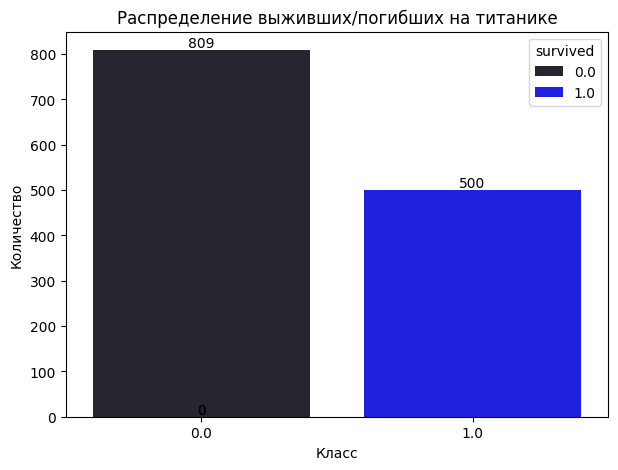

In [94]:
plt.figure(figsize=(7, 5))

ax = sns.countplot(x='survived', data=df, color='blue', hue='survived')
plt.title('Распределение выживших/погибших на титанике')  
plt.xlabel('Класс')
plt.ylabel('Количество')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')


plt.show()


В таком случае **лучше использовать PR метрику**, потому что
PR не зависит от доминирующего класса (погибших), оценивает, насколько хорошо модель находит выживших. Также эта метрика чувствительна к ложным отрицаниям. 


**Задание 4.** Масштабирование количественных признаков

Построение диаграммы BoxPlot для признаков до масштабирования

для начала нужно посмотреть на данныи и предобработать их

In [95]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [96]:
missing_percent = df.isnull().mean() * 100
missing_percent_sorted = missing_percent.sort_values(ascending=False)

missing_percent_sorted

body         90.763359
cabin        77.480916
boat         62.900763
home.dest    43.129771
age          20.152672
embarked      0.229008
fare          0.152672
sibsp         0.076336
name          0.076336
survived      0.076336
pclass        0.076336
sex           0.076336
parch         0.076336
ticket        0.076336
dtype: float64

In [97]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [98]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Замена запятых на точки в колонке age. Потом буду заполнять пустые значения KNN

In [99]:
df['age'] = df['age'].str.replace(',', '.').astype(float)

In [100]:
imputer = KNNImputer(n_neighbors=3)
df['age'] = imputer.fit_transform(df[['age']])

In [101]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

Только что были убраны пропуски в колонке age. Теперь нужно убрать пропуски в колонке boat

In [102]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


данные в колонке boat странные - то числа, то буквы. Было решено проверить, есть ли зависимость между лодкой или её отсутствием с выживаемостью. Может быть номер лодки вообще не имеет значения?

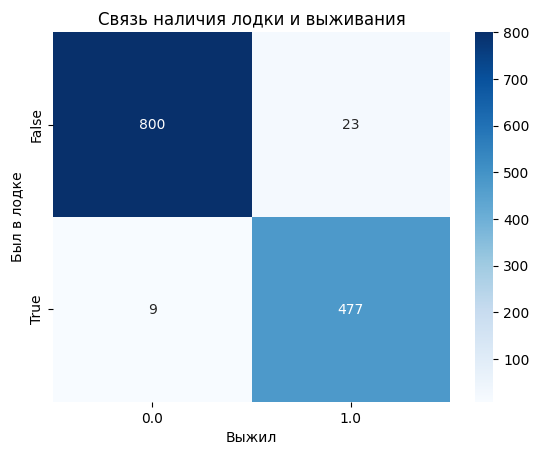

In [103]:
pd.crosstab(df['boat'].isna(), df['survived'])


sns.heatmap(pd.crosstab(df['boat'].notna(), df['survived']), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Связь наличия лодки и выживания')
plt.xlabel('Выжил')
plt.ylabel('Был в лодке')
plt.show()

Беря во внимания предыдущий график, откуда мы знаем, что погибло 809 человек, можно заметить четкую связь между наличием лодки и выживаемостью человека. 800 человек, у которых в колонке boat NaN (скорее всего они не были в лодке) погибли.

Да, к тепловой карте также есть вопросы. Например, кто такие эти 23 человека, что не были в лодке, но выжили? А кто такие те, кто был в лодке, но не выжил?  Объяснить это можно (субъективное мнение) разными способами. 23 человека, что сумели выжить без лодки - упали в воду, но позже из подобрала какая то лодка. Или их спасли позже. 9 человек могли умереть в лодке от переохлаждения или других ран. Вполне возможно, что это были старики, что не могли выдержать сильно стресса. Это лишь личные предположения, но они доказывают, что такие зависимости можно достаточно легко объяснить.

После построения тепловой карты, становится очевидно, что неважен номер лодки, к тому же его достаточно тяжело будет заполнить какими-то методами. Важнее **наличие** или **отсутствие** лодки. Поэтому лучше будет создать отдельный бинарный столбец, а старый удалить вовсе, чтобы модели было проще обучаться 

In [104]:
df['had_boat'] = df['boat'].notna().astype(int)
df = df.drop('boat', axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest,had_boat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,"211,3375",B5,S,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,"151,5500",C22 C26,S,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0


по заданию нужно сделать масштабирование количественных признаков. Последний столбец, где нет слишком много пропусков - body. В txt файле про него нет никакой информации, а пропусков так много, что смысла держать этот столбец - нет

In [105]:
df = df.drop('body', axis=1)

Построение boxplot для количественных признаков до масштабирования:

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
 12  had_boat   1310 non-null   int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 133.2+ KB


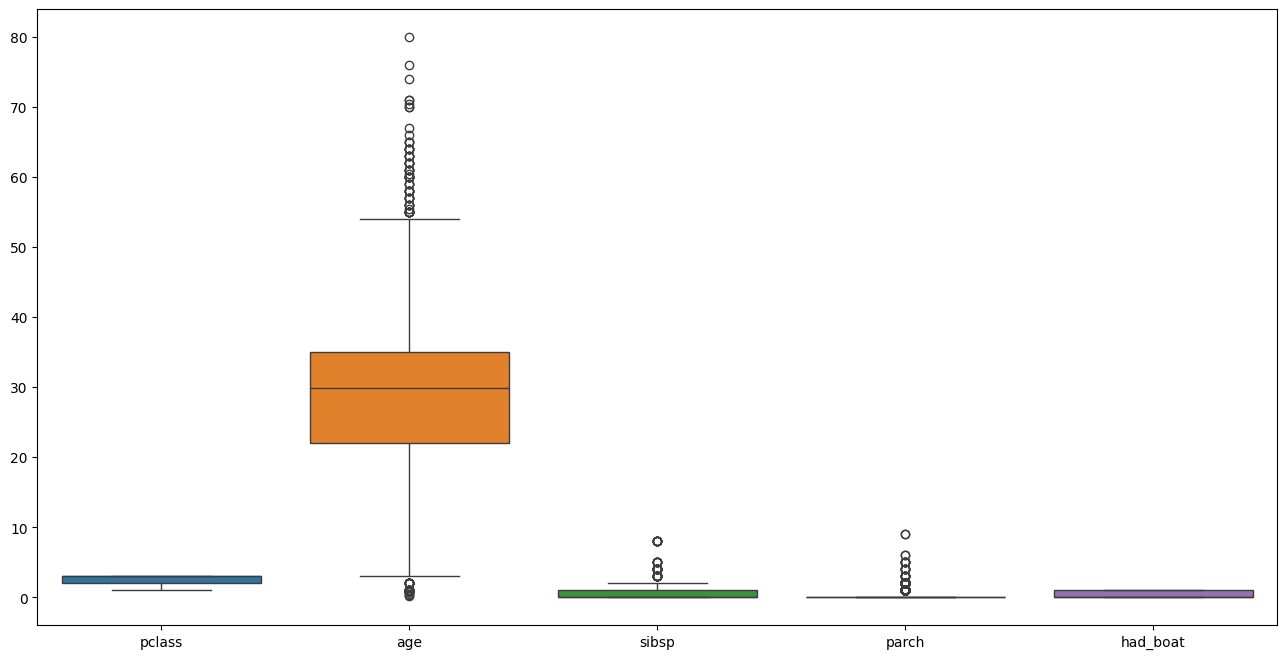

In [107]:
numeric_features = ['pclass', 'age', 'sibsp', 'parch', 'had_boat']


plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=df[numeric_features])
plt.show()

Масштабирование количественных признаков. Было решено использовать стандартизацию (StandartScaler).

In [108]:
df_original = df

In [109]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,had_boat
0,-1.546098,1.0,"Allen, Miss. Elisabeth Walton",female,-0.068446,-0.479087,-0.445000,24160,"211,3375",B5,S,"St Louis, MO",1.302103
1,-1.546098,1.0,"Allison, Master. Hudson Trevor",male,-2.249951,0.481288,1.866526,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON",1.302103
2,-1.546098,0.0,"Allison, Miss. Helen Loraine",female,-2.165801,0.481288,1.866526,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON",-0.767988
3,-1.546098,0.0,"Allison, Mr. Hudson Joshua Creighton",male,0.009233,0.481288,1.866526,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON",-0.767988
4,-1.546098,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,-0.379166,0.481288,1.866526,113781,"151,5500",C22 C26,S,"Montreal, PQ / Chesterville, ON",-0.767988


Построение boxplot для количественных признаков после масштабирования:

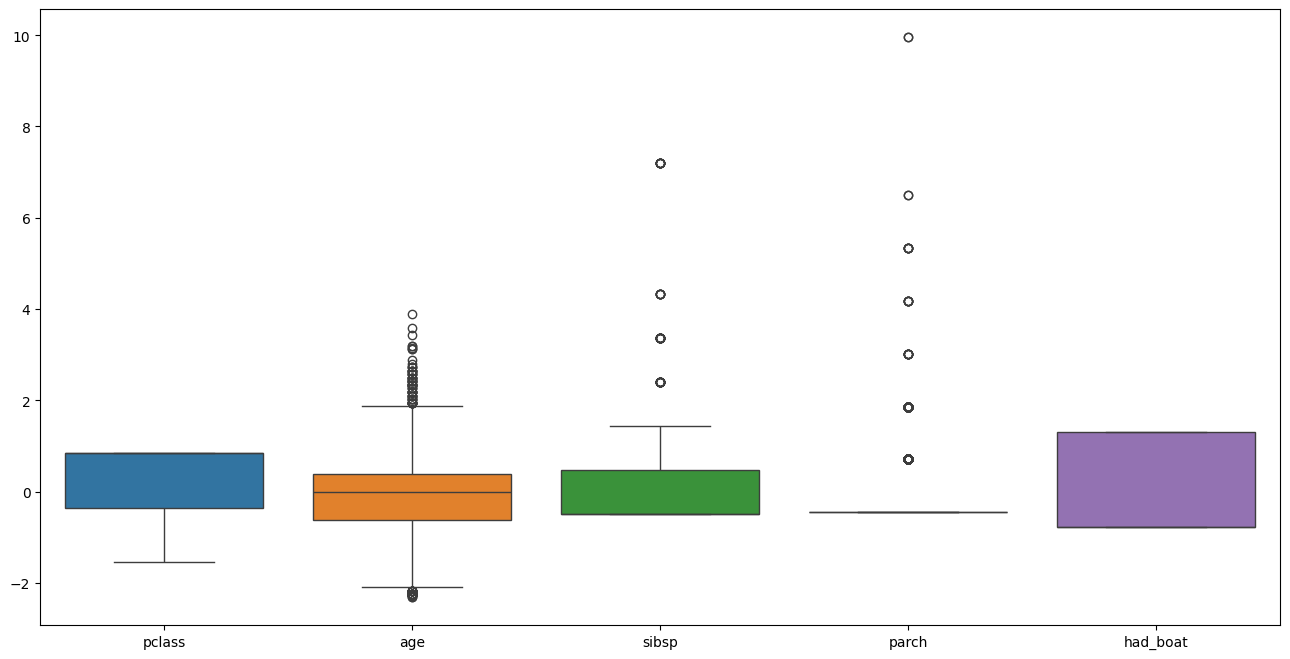

In [110]:
numeric_features = ['pclass', 'age', 'sibsp', 'parch', 'had_boat']


plt.figure(figsize=(16, 8))
ax = sns.boxplot(data=df[numeric_features])
plt.show()

**Задание 5.** Выполните замену категориальных признаков (label encoder и one hot encoder)

Для колонки sex был выбран LabelEncoder, потому что это всего лишь бинарный признак.

In [111]:
labelEncoder = LabelEncoder()
df['sex'] = labelEncoder.fit_transform(df['sex'])

Колонка fare подвергнется StandartScaler'у.

In [112]:
df['fare'] = df['fare'].str.replace(',', '.').astype(float)
scaler = StandardScaler()
df['fare'] = scaler.fit_transform(df[['fare']])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1310 non-null   int64  
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
 12  had_boat   1310 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 133.2+ KB


для колонки embarked был выбран one-hot encoder, потому что это номинальный признак, не имеющий порядка. 
колонка ticket имеет слишком сного уникальных значений, с помощью ooneHotEncooding датасет будет слишком большим, поэтому было приянто решение удалить его
подобная логика присутсвует в колонке name. Из нее можно было бы вытащить титул, но класс пассажира говорит сам за себя.
та же логика с home.dest



In [114]:
df = pd.get_dummies(df, columns=['embarked'], prefix='emb')

In [115]:
df.drop('ticket', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('home.dest', axis=1, inplace=True)

In [116]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,had_boat,emb_C,emb_Q,emb_S
0,-1.546098,1.0,0,-0.068446,-0.479087,-0.445000,3.441165,B5,1.302103,False,False,True
1,-1.546098,1.0,1,-2.249951,0.481288,1.866526,2.285603,C22 C26,1.302103,False,False,True
2,-1.546098,0.0,0,-2.165801,0.481288,1.866526,2.285603,C22 C26,-0.767988,False,False,True
3,-1.546098,0.0,1,0.009233,0.481288,1.866526,2.285603,C22 C26,-0.767988,False,False,True
4,-1.546098,0.0,0,-0.379166,0.481288,1.866526,2.285603,C22 C26,-0.767988,False,False,True


Для колонки cabin лучше использовать oneHot, но для начала нужно отделить букву из каждого значения - это палубы. Иначе будет слишком раздутый датасет.

In [117]:
df['letter'] = df['cabin'].str[0]
df['letter'] = df['letter'].fillna('неизвестно')

In [118]:
df = pd.get_dummies(df, columns=['letter'], prefix='let')

In [119]:
df.drop('cabin', axis=1, inplace=True)

In [120]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,had_boat,emb_C,emb_Q,emb_S,let_A,let_B,let_C,let_D,let_E,let_F,let_G,let_T,let_неизвестно
0,-1.546098,1.0,0,-0.068446,-0.479087,-0.445000,3.441165,1.302103,False,False,True,False,True,False,False,False,False,False,False,False
1,-1.546098,1.0,1,-2.249951,0.481288,1.866526,2.285603,1.302103,False,False,True,False,False,True,False,False,False,False,False,False
2,-1.546098,0.0,0,-2.165801,0.481288,1.866526,2.285603,-0.767988,False,False,True,False,False,True,False,False,False,False,False,False
3,-1.546098,0.0,1,0.009233,0.481288,1.866526,2.285603,-0.767988,False,False,True,False,False,True,False,False,False,False,False,False
4,-1.546098,0.0,0,-0.379166,0.481288,1.866526,2.285603,-0.767988,False,False,True,False,False,True,False,False,False,False,False,False


**Задание 6.** Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других 

In [121]:
df_with_no_corr = df

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pclass          1309 non-null   float64
 1   survived        1309 non-null   float64
 2   sex             1310 non-null   int64  
 3   age             1310 non-null   float64
 4   sibsp           1309 non-null   float64
 5   parch           1309 non-null   float64
 6   fare            1308 non-null   float64
 7   had_boat        1310 non-null   float64
 8   emb_C           1310 non-null   bool   
 9   emb_Q           1310 non-null   bool   
 10  emb_S           1310 non-null   bool   
 11  let_A           1310 non-null   bool   
 12  let_B           1310 non-null   bool   
 13  let_C           1310 non-null   bool   
 14  let_D           1310 non-null   bool   
 15  let_E           1310 non-null   bool   
 16  let_F           1310 non-null   bool   
 17  let_G           1310 non-null   b

In [123]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

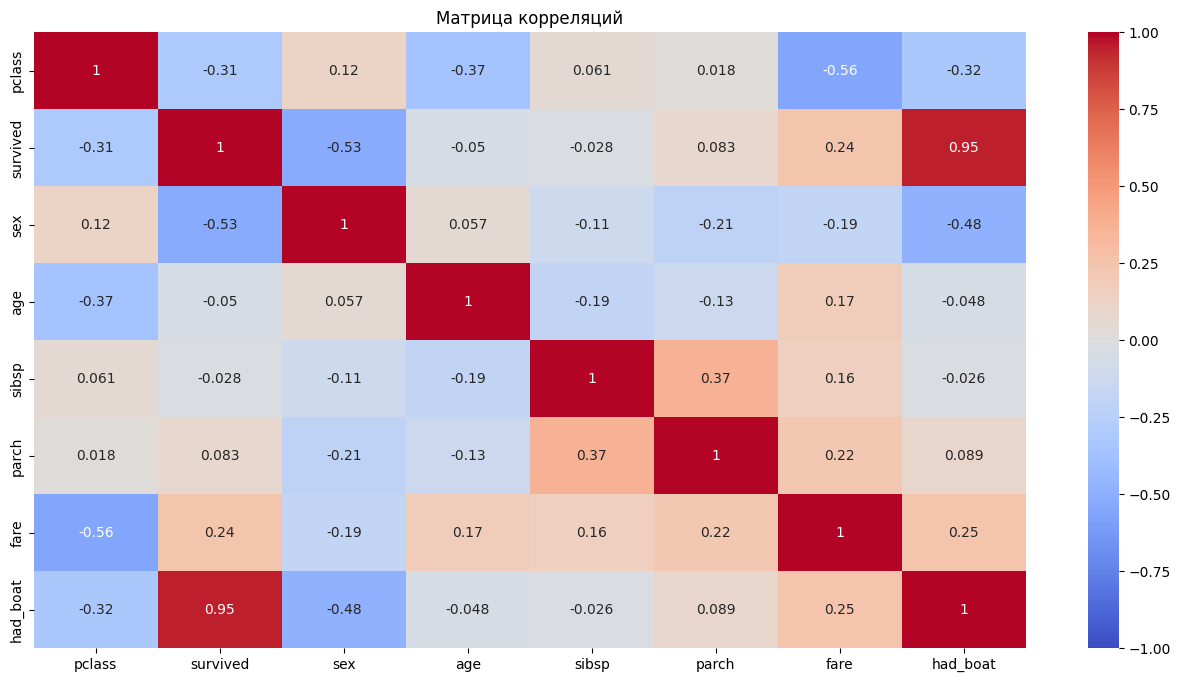

In [124]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций')

plt.show()

На теплокарте не было замечено сильной корреляции между признаками. Единственное - had_boat и survived. Но survived - это целевая колонка

**Задание 7.** Заполните пропущенные значения в данных; (imputers)

In [125]:
missing_values = df.isnull().sum()
missing_values

pclass            1
survived          1
sex               0
age               0
sibsp             1
parch             1
fare              2
had_boat          0
emb_C             0
emb_Q             0
emb_S             0
let_A             0
let_B             0
let_C             0
let_D             0
let_E             0
let_F             0
let_G             0
let_T             0
let_неизвестно    0
dtype: int64

In [126]:
knn_classifier = KNNImputer(n_neighbors=5)

df_imputed = knn_classifier.fit_transform(df)


**Классификатор KNN**

In [127]:
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
df_before = df_imputed


In [128]:
df_imputed.head()

,pclass,survived,sex,age,sibsp,parch,fare,had_boat,emb_C,emb_Q,emb_S,let_A,let_B,let_C,let_D,let_E,let_F,let_G,let_T,let_неизвестно
0,-1.546098,1.0,0.0,-0.068446,-0.479087,-0.445000,3.441165,1.302103,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.546098,1.0,1.0,-2.249951,0.481288,1.866526,2.285603,1.302103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.546098,0.0,0.0,-2.165801,0.481288,1.866526,2.285603,-0.767988,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.546098,0.0,1.0,0.009233,0.481288,1.866526,2.285603,-0.767988,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.546098,0.0,0.0,-0.379166,0.481288,1.866526,2.285603,-0.767988,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X = df_imputed.drop('survived', axis=1)
y = df_imputed['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

поменять оценку

In [130]:
from sklearn.metrics import classification_report, confusion_matrix


# Предсказание для тестовых данных
y_pred = knn.predict(X_test)

# Отчет по метрикам
print(classification_report(y_test, y_pred))

# Матрица ошибок
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       231
         1.0       0.98      0.97      0.97       162

    accuracy                           0.98       393
   macro avg       0.98      0.98      0.98       393
weighted avg       0.98      0.98      0.98       393

[[227   4]
 [  5 157]]


**Классификатор Perceptron**

In [131]:
from sklearn.linear_model import Perceptron


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

perceptron = Perceptron(
    max_iter=1000,  
    eta0=0.1,       # Скорость обучения (?)
    random_state=42,
    early_stopping=True  # Остановка, если качество не растет
)


perceptron.fit(X_train, y_train)

Perceptron(early_stopping=True, eta0=0.1, random_state=42)

In [132]:
y_pred = perceptron.predict(X_test)

# Отчет по метрикам
print(classification_report(y_test, y_pred))

# Матрица ошибок
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       231
         1.0       0.92      0.98      0.95       162

    accuracy                           0.96       393
   macro avg       0.95      0.96      0.96       393
weighted avg       0.96      0.96      0.96       393

[[218  13]
 [  4 158]]


**Задание 9.** Построение кривых для оценки качетва классификаторов по метрике PR (уже выбрал её в начале)

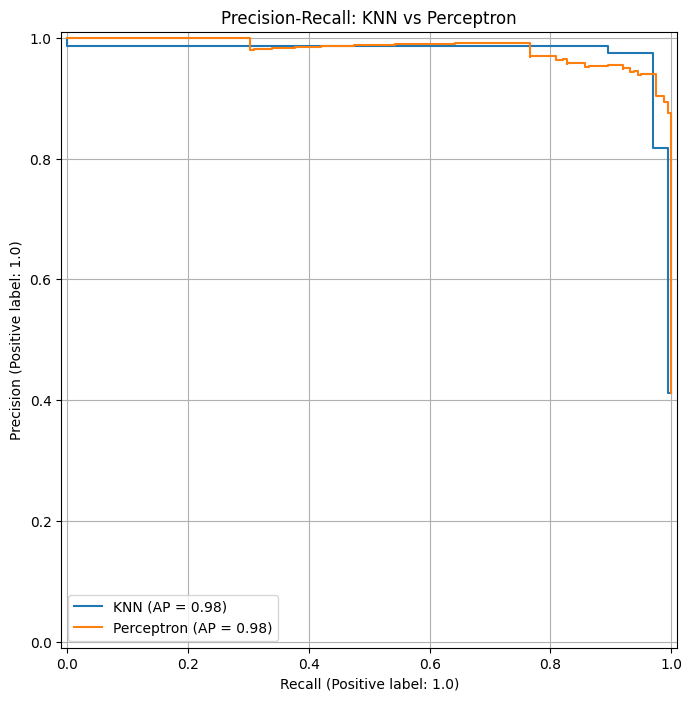

In [133]:
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(16, 8))

PrecisionRecallDisplay.from_estimator(knn, X_test, y_test, name="KNN", ax=ax)
PrecisionRecallDisplay.from_estimator(perceptron, X_test, y_test, name="Perceptron", ax=ax)

plt.title("Precision-Recall: KNN vs Perceptron")
plt.legend()
plt.grid(True)
plt.show()

Как видно из графика, оба графика, в целом, замечательно справляются с посталеной задачей (оба стремятся к (1, 1))

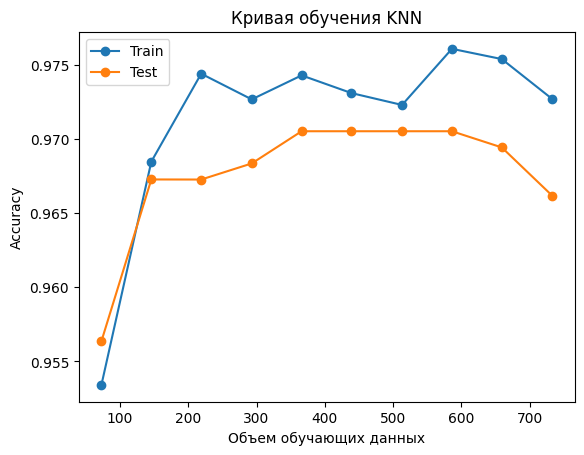

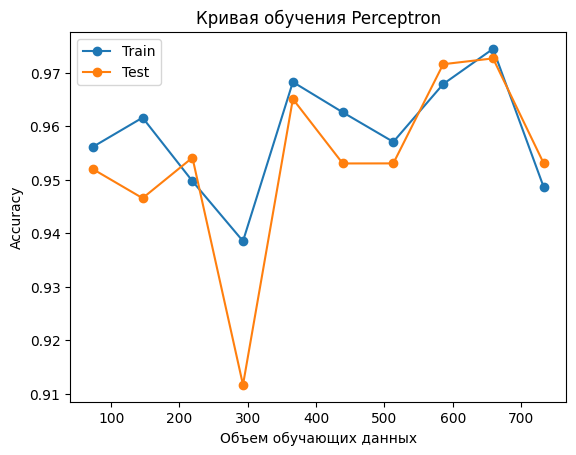

In [134]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Объем обучающих данных")
    plt.ylabel("Accuracy")
    
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Train")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Test")
    plt.legend()
    plt.show()

plot_learning_curve(knn, "Кривая обучения KNN", X_train, y_train)
plot_learning_curve(perceptron, "Кривая обучения Perceptron", X_train, y_train)

**Перекрестная проверка (Cross-Validation).** это метод оценки обобщающей способности модели, при котором данные разбиваются на k частей (folds). Модель обучается на k-1 частях и проверяется на оставшейся. Процесс повторяется k раз, и результаты усредняются.

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, average_precision_score

ap_scorer = make_scorer(average_precision_score)

knn_ap_scores = cross_val_score(knn, X, y, cv=5, scoring=ap_scorer)
print(f"KNN: Средний Average Precision = {knn_ap_scores.mean():.2f} (±{knn_ap_scores.std():.2f})")

perceptron_ap_scores = cross_val_score(perceptron, X, y, cv=5, scoring=ap_scorer)
print(f"Perceptron: Средний Average Precision = {perceptron_ap_scores.mean():.2f} (±{perceptron_ap_scores.std():.2f})")

KNN: Средний Average Precision = 0.90 (±0.07)
Perceptron: Средний Average Precision = 0.93 (±0.01)


**GridSearchCV** позволяет провести решётчатый поиск по заданным наборам гиперпараметров, применяя кросс-валидацию для каждой комбинации и выбирая наилучшие.

In [136]:
# гиперпараметры

search_space = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['cityblock', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [137]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator=knn,
                  param_grid=search_space, 
                  cv=5, 
                  scoring='f1',
                  n_jobs=-1)

GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [138]:
print(f'Лучшие параметры: {GS.best_params_}\nЛучший результат: {GS.best_score_}')

Лучшие параметры: {'algorithm': 'auto', 'metric': 'cityblock', 'n_neighbors': 7, 'weights': 'uniform'}
Лучший результат: 0.959054993486492


In [139]:
search_space_perc = {
    'max_iter': [200, 500, 1000, 1100],
    'eta0': [0.1, 0.5, 1, 1.5],
    'early_stopping': [True, False]
}

GS_perc = GridSearchCV(estimator=perceptron,
                  param_grid=search_space_perc, 
                  cv=5, 
                  scoring='f1',
                  n_jobs=-1)

GS_perc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Perceptron(early_stopping=True, eta0=0.1,
                                  random_state=42),
             n_jobs=-1,
             param_grid={'early_stopping': [True, False],
                         'eta0': [0.1, 0.5, 1, 1.5],
                         'max_iter': [200, 500, 1000, 1100]},
             scoring='f1')

In [140]:
print(f'Лучшие параметры: {GS_perc.best_params_}\nЛучший результат: {GS_perc.best_score_}')

Лучшие параметры: {'early_stopping': False, 'eta0': 0.1, 'max_iter': 200}
Лучший результат: 0.9433814405231541


Как видно, модель работает очень хорошо. Связать это можно с тем, что те, у кого была лодка выжили почти со 100%-ой вероятностью. Попробуем убрать эту колонку

In [141]:
df_imputed.head()

,pclass,survived,sex,age,sibsp,parch,fare,had_boat,emb_C,emb_Q,emb_S,let_A,let_B,let_C,let_D,let_E,let_F,let_G,let_T,let_неизвестно
0,-1.546098,1.0,0.0,-0.068446,-0.479087,-0.445000,3.441165,1.302103,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.546098,1.0,1.0,-2.249951,0.481288,1.866526,2.285603,1.302103,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.546098,0.0,0.0,-2.165801,0.481288,1.866526,2.285603,-0.767988,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.546098,0.0,1.0,0.009233,0.481288,1.866526,2.285603,-0.767988,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.546098,0.0,0.0,-0.379166,0.481288,1.866526,2.285603,-0.767988,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
df_imputed = df_imputed.drop('had_boat', axis=1)

**Классиификатор KNN**

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X1 = df_imputed.drop('survived', axis=1)
y1 = df_imputed['survived']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
knn1 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(X_train1, y_train1)


KNeighborsClassifier()

In [144]:
from sklearn.metrics import classification_report, confusion_matrix


# Предсказание для тестовых данных
y_pred1 = knn1.predict(X_test1)

# Отчет по метрикам
print(classification_report(y_test1, y_pred1))

# Матрица ошибок
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       231
         1.0       0.76      0.66      0.71       162

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.78      0.78      0.77       393

[[198  33]
 [ 55 107]]


**Классификатор Perceptron**

In [145]:
from sklearn.linear_model import Perceptron


X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, 
    test_size=0.3, 
    random_state=42
)


from sklearn.linear_model import Perceptron


perceptron1 = Perceptron(
    max_iter=1000,  # Максимальное число итераций
    eta0=0.1,       # Скорость обучения
    random_state=42,
    early_stopping=True  # Остановка, если качество не растет
)

perceptron1.fit(X_train1, y_train1)

Perceptron(early_stopping=True, eta0=0.1, random_state=42)

In [146]:
y_pred1 = perceptron1.predict(X_test1)

print(classification_report(y_test1, y_pred1))

print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       231
         1.0       0.75      0.65      0.70       162

    accuracy                           0.77       393
   macro avg       0.76      0.75      0.76       393
weighted avg       0.77      0.77      0.77       393

[[196  35]
 [ 56 106]]


Перекрестная проверка

In [147]:
ap_scorer1 = make_scorer(average_precision_score)

knn_ap_scores1 = cross_val_score(knn1, X1, y1, cv=5, scoring=ap_scorer1)
print(f"KNN1: Средний Average Precision = {knn_ap_scores1.mean():.2f} (±{knn_ap_scores1.std():.2f})")

perceptron_ap_scores1 = cross_val_score(perceptron1, X1, y1, cv=5, scoring=ap_scorer1)
print(f"Perceptron1: Средний Average Precision = {perceptron_ap_scores1.mean():.2f} (±{perceptron_ap_scores1.std():.2f})")

KNN1: Средний Average Precision = 0.48 (±0.03)
Perceptron1: Средний Average Precision = 0.47 (±0.10)


**Задание 9.** Построение кривых для оценки качетва классификаторов по метрике PR (уже выбрал её в начале)

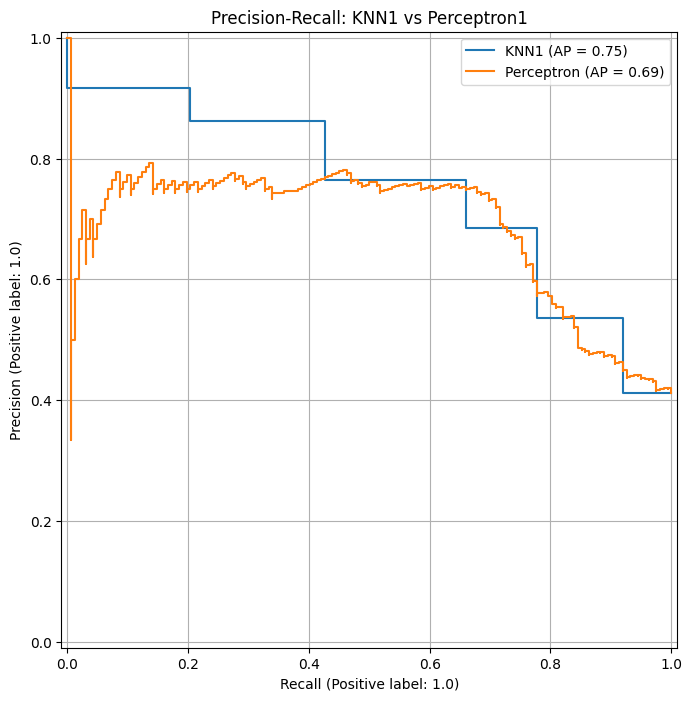

In [148]:
fig, ax = plt.subplots(figsize=(16, 8))

PrecisionRecallDisplay.from_estimator(knn1, X_test1, y_test1, name="KNN1", ax=ax)
PrecisionRecallDisplay.from_estimator(perceptron1, X_test1, y_test1, name="Perceptron", ax=ax)

plt.title("Precision-Recall: KNN1 vs Perceptron1")
plt.legend()
plt.grid(True)
plt.show()

Судя по графику, можно с уверенностью удтверждать, что классификатор KNN выигрывает

In [149]:
GS1 = GridSearchCV(estimator=knn1,
                  param_grid=search_space, 
                  cv=5, 
                  scoring='f1',
                  n_jobs=-1)

GS1.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [150]:
print(f'Лучшие параметры: {GS1.best_params_}\nЛучший результат: {GS1.best_score_}')

Лучшие параметры: {'algorithm': 'auto', 'metric': 'cityblock', 'n_neighbors': 11, 'weights': 'uniform'}
Лучший результат: 0.6632359688695677


In [151]:
GS_perc1 = GridSearchCV(estimator=perceptron1,
                  param_grid=search_space_perc, 
                  cv=5, 
                  scoring='f1',
                  n_jobs=-1)

GS_perc1.fit(X_train1, y_train1)

GridSearchCV(cv=5,
             estimator=Perceptron(early_stopping=True, eta0=0.1,
                                  random_state=42),
             n_jobs=-1,
             param_grid={'early_stopping': [True, False],
                         'eta0': [0.1, 0.5, 1, 1.5],
                         'max_iter': [200, 500, 1000, 1100]},
             scoring='f1')

In [152]:
print(f'Лучшие параметры: {GS_perc1.best_params_}\nЛучший результат: {GS_perc1.best_score_}')

Лучшие параметры: {'early_stopping': True, 'eta0': 0.1, 'max_iter': 200}
Лучший результат: 0.6499253537189585


**ВЫВОД**

В первом случае, в датасете присутствовала колонка had_boat, с задачей лучше справился классификатор KNN. Показания его метрик на 0.02+ лучше. Во втором случае, когда была удалена колонка had_boat, метрики классификатора KNN снова оказались Лучше (что на графике, что в гридсерче, хоть там и разные метрики). KNN выигрывает с лучшим результатом 0.66, тогда как у Perceptron 0.64.